## Problem
Given clinical parameters predict does the patient has heart disease or not

## Data
Originally from -> https://archive.ics.uci.edu/ml/datasets/heart+disease
Source -> https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## Evaluvation
accuracy-> 0.95++

## Features
Dataset has 76 features, We would be using only 16

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Fitting data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
#Evaluvating
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,plot_roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score


## Data ko jaana
data ko andar bahr pura jaano, kis type ka hai, kya hai, kitne null hai, kya kya kar sakte model improve krne ke liye

In [3]:
dt=pd.read_csv("heart_disease_uci.csv")
dt

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


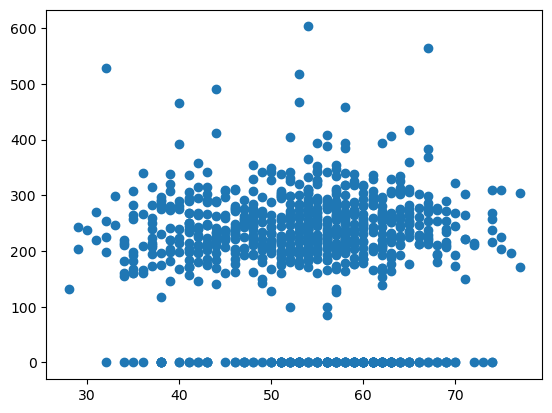

In [5]:
plt.scatter(dt["age"],dt['chol'])

<AxesSubplot:>

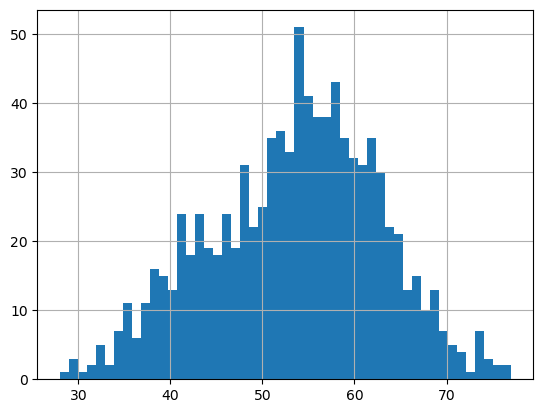

In [6]:
dt["age"].hist(bins=50)

In [7]:
fr=dt["cp"].value_counts()

In [8]:
dt["cp"].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [9]:
x=pd.DataFrame(dt["age"].groupby(dt["cp"]))
y=pd.Series(np.arange(0,dt["cp"].unique().size-1,1))
x

,0,1
0,asymptomatic,1 67 2 67 6 62 7 57 8 ...
1,atypical angina,4 41 5 56 11 56 13 44 16 ...
2,non-anginal,3 37 12 56 14 52 15 57 18 ...
3,typical angina,0 63 20 64 21 58 27 66 30 ...


In [10]:
ls1=[]
ls2=[]
i=0
for ls in x[1]:
    for ele in ls:
        ls1.append(ele)
        ls2.append(i)
    i+=1

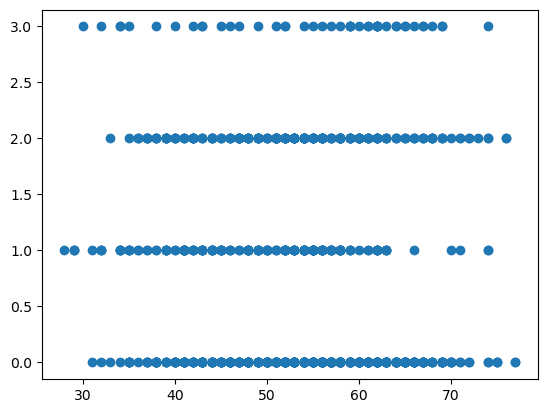

In [11]:
ls1=pd.Series(ls1)
ls2=pd.Series(ls2)
plt.scatter(ls1,ls2)

In [12]:
ls1=[]
ls2=[]
i=0
for (ls,tp) in zip(x[1],x[0]):
    for ele in ls:
        ls1.append(ele)
        ls2.append(tp)

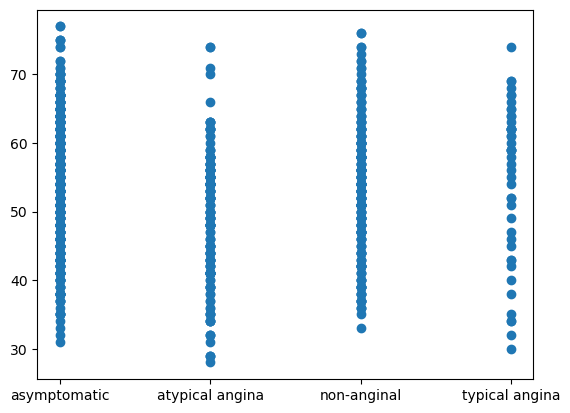

In [13]:
ls1=pd.Series(ls1)
ls2=pd.Series(ls2)
plt.scatter(ls2,ls1)

In [14]:
x=dt["cp"].groupby(axis=0,by=dt["age"])

In [15]:
pr=pd.DataFrame(x)

In [16]:
pr

,0,1
0,28,"303 atypical angina Name: cp, dtype: object"
1,29,132 atypical angina 304 atypical angina ...
2,30,"306 typical angina Name: cp, dtype: object"
3,31,307 atypical angina 491 asymptomatic ...
4,32,308 atypical angina 309 atypical angina ...
5,33,311 non-anginal 492 asymptomatic Name: ...
6,34,101 typical angina 225 atypical angina ...
7,35,117 asymptomatic 138 asymptomatic ...
8,36,319 atypical angina 320 non-anginal ...
9,37,3 non-anginal 210 non-anginal ...


In [17]:
pr["unique"]=np.array(pr[1].value_counts)

In [18]:
pr["unique"]

0     <bound method IndexOpsMixin.value_counts of 0 ...
1     <bound method IndexOpsMixin.value_counts of 0 ...
2     <bound method IndexOpsMixin.value_counts of 0 ...
3     <bound method IndexOpsMixin.value_counts of 0 ...
4     <bound method IndexOpsMixin.value_counts of 0 ...
5     <bound method IndexOpsMixin.value_counts of 0 ...
6     <bound method IndexOpsMixin.value_counts of 0 ...
7     <bound method IndexOpsMixin.value_counts of 0 ...
8     <bound method IndexOpsMixin.value_counts of 0 ...
9     <bound method IndexOpsMixin.value_counts of 0 ...
10    <bound method IndexOpsMixin.value_counts of 0 ...
11    <bound method IndexOpsMixin.value_counts of 0 ...
12    <bound method IndexOpsMixin.value_counts of 0 ...
13    <bound method IndexOpsMixin.value_counts of 0 ...
14    <bound method IndexOpsMixin.value_counts of 0 ...
15    <bound method IndexOpsMixin.value_counts of 0 ...
16    <bound method IndexOpsMixin.value_counts of 0 ...
17    <bound method IndexOpsMixin.value_counts o

In [19]:
pr.drop("unique",axis=1)

,0,1
0,28,"303 atypical angina Name: cp, dtype: object"
1,29,132 atypical angina 304 atypical angina ...
2,30,"306 typical angina Name: cp, dtype: object"
3,31,307 atypical angina 491 asymptomatic ...
4,32,308 atypical angina 309 atypical angina ...
5,33,311 non-anginal 492 asymptomatic Name: ...
6,34,101 typical angina 225 atypical angina ...
7,35,117 asymptomatic 138 asymptomatic ...
8,36,319 atypical angina 320 non-anginal ...
9,37,3 non-anginal 210 non-anginal ...


In [20]:
arr=[]
for ob,age in zip(pr[1],pr[0]):
    
    dt=ob.to_string()
    words=dt.split('\n')
    
    krds=[]
    for sc in words:
        krds=krds+sc.split('    ')
    print(krds)
    

    # for _ in ob:
        # print(ob["atypical angina"])
            
     

['303', 'atypical angina']
['132', 'atypical angina', '304', 'atypical angina', '305', 'atypical angina']
['306', 'typical angina']
['307', 'atypical angina', '491', '   asymptomatic']
['308', 'atypical angina', '309', 'atypical angina', '310', 'atypical angina', '528', '   asymptomatic', '597', ' typical angina']
['311', ' non-anginal', '492', 'asymptomatic']
['101', ' typical angina', '225', 'atypical angina', '312', 'atypical angina', '313', 'atypical angina', '314', 'atypical angina', '493', ' typical angina', '598', '   asymptomatic']
['117', '   asymptomatic', '138', '   asymptomatic', '168', '   asymptomatic', '283', 'atypical angina', '315', ' typical angina', '316', '   asymptomatic', '317', 'atypical angina', '318', 'atypical angina', '494', 'atypical angina', '599', '   asymptomatic', '816', '', 'non-anginal']
['319', 'atypical angina', '320', '', 'non-anginal', '321', '', 'non-anginal', '322', '', 'non-anginal', '495', 'atypical angina', '600', '   asymptomatic']
['3', '', 

In [21]:
dict={

}
dk=pd.read_csv("heart_disease_uci.csv")
dk

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
ar1=dk["age"].unique()
ar2=dk["cp"].unique()
for i in ar1:
    for j in ar2:
     dict.setdefault(i,{})[j]=0

In [23]:
print(dict)

{63: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 67: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 37: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 41: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 56: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 62: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 57: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 53: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 44: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 52: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 48: {'typical angina': 0, 'asymptomatic': 0, 'non-anginal': 0, 'atypical angina': 0}, 54: {'typical angina': 0, 'asymptomatic': 0, 'non-ang

In [24]:
for i,j in zip(dk["age"],dk["cp"]):
    dict[i][j]=dict[i][j]+1

In [25]:
print(dict)

{63: {'typical angina': 1, 'asymptomatic': 21, 'non-anginal': 4, 'atypical angina': 4}, 67: {'typical angina': 2, 'asymptomatic': 10, 'non-anginal': 3, 'atypical angina': 0}, 37: {'typical angina': 0, 'asymptomatic': 4, 'non-anginal': 5, 'atypical angina': 2}, 41: {'typical angina': 0, 'asymptomatic': 9, 'non-anginal': 3, 'atypical angina': 12}, 56: {'typical angina': 1, 'asymptomatic': 20, 'non-anginal': 9, 'atypical angina': 8}, 62: {'typical angina': 5, 'asymptomatic': 19, 'non-anginal': 6, 'atypical angina': 5}, 57: {'typical angina': 1, 'asymptomatic': 27, 'non-anginal': 4, 'atypical angina': 6}, 53: {'typical angina': 0, 'asymptomatic': 18, 'non-anginal': 9, 'atypical angina': 6}, 44: {'typical angina': 0, 'asymptomatic': 8, 'non-anginal': 5, 'atypical angina': 6}, 52: {'typical angina': 2, 'asymptomatic': 19, 'non-anginal': 7, 'atypical angina': 8}, 48: {'typical angina': 0, 'asymptomatic': 17, 'non-anginal': 6, 'atypical angina': 8}, 54: {'typical angina': 1, 'asymptomatic': 22

In [26]:
t_n=[]
a_s=[]
n_a=[]
a_a=[]
for i in ar1:
    t_n.append(dict[i]["typical angina"])
for i in ar1:
    a_s.append(dict[i]["asymptomatic"])
for i in ar1:
    n_a.append(dict[i]["non-anginal"])
for i in ar1:
    a_a.append(dict[i]["atypical angina"])




C:\Users\sjmad\AppData\Local\Temp\ipykernel_18232\3818101326.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  c_p_t.plot.bar(figsize=(20,20),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})


<AxesSubplot:xlabel='age'>

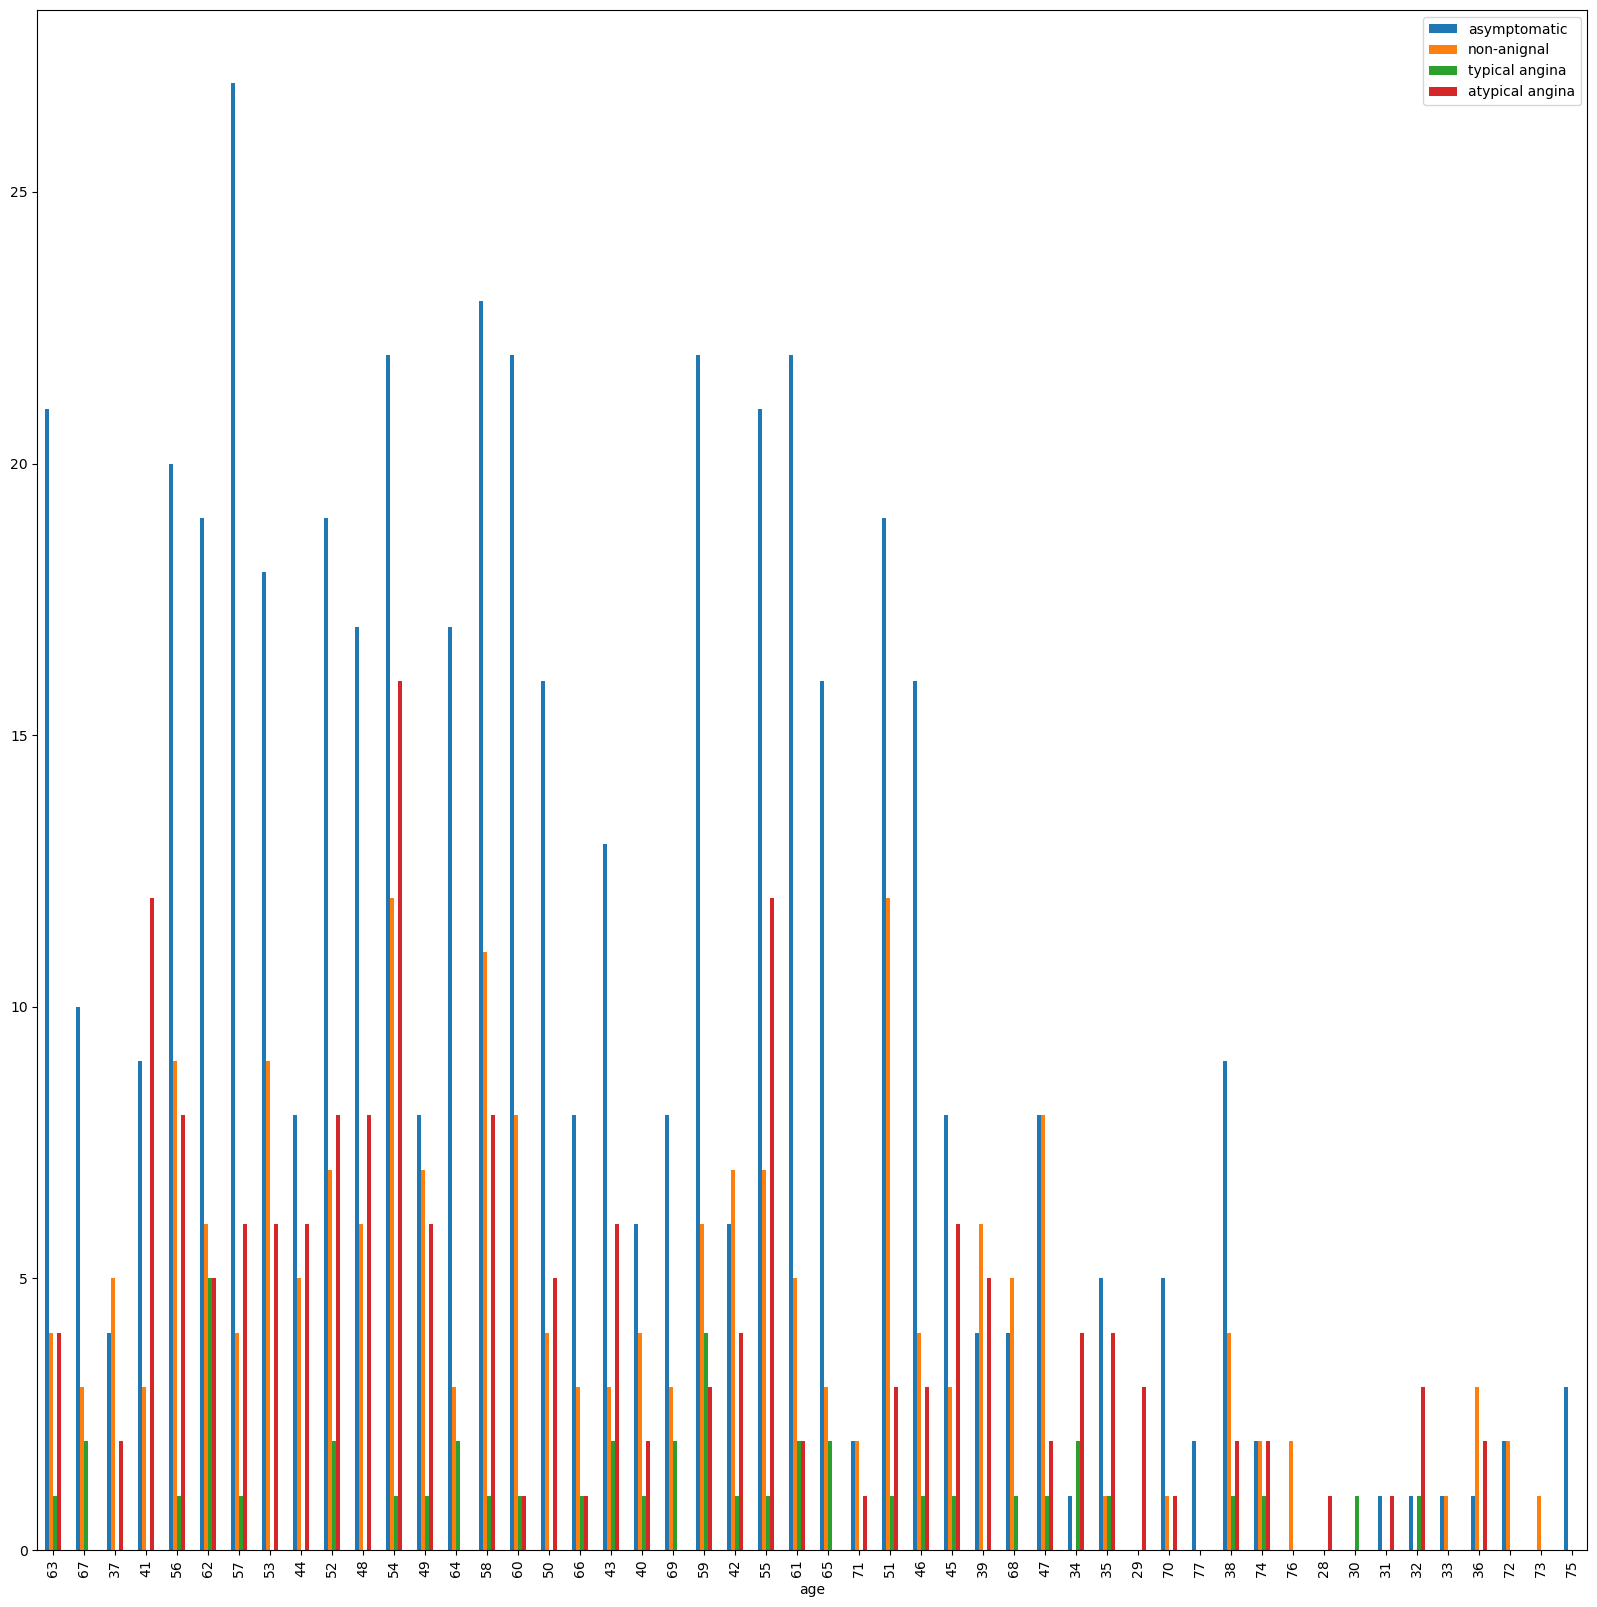

In [27]:
c_p_t=pd.DataFrame()
c_p_t["age"]=ar1
c_p_t["asymptomatic"]=a_s
c_p_t["typical angina"]=t_n
c_p_t["non-anignal"]=n_a
c_p_t["atypical angina"]=a_a


c_p_t.plot.bar(figsize=(20,20),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})

# for i in ar1:
#     t_n.append(dict[i]["typical angina"])
# for i in ar1:
#     a_s.append(dict[i]["asymptomatic"])
# for i in ar1:
#     n_a.append(dict[i]["non-anginal"])
# for i in ar1:
#     a_a.append(dict[i]["typical angina"])


C:\Users\sjmad\AppData\Local\Temp\ipykernel_18232\1661793388.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  c_p_t.plot.barh(figsize=(20,40),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})


<AxesSubplot:ylabel='age'>

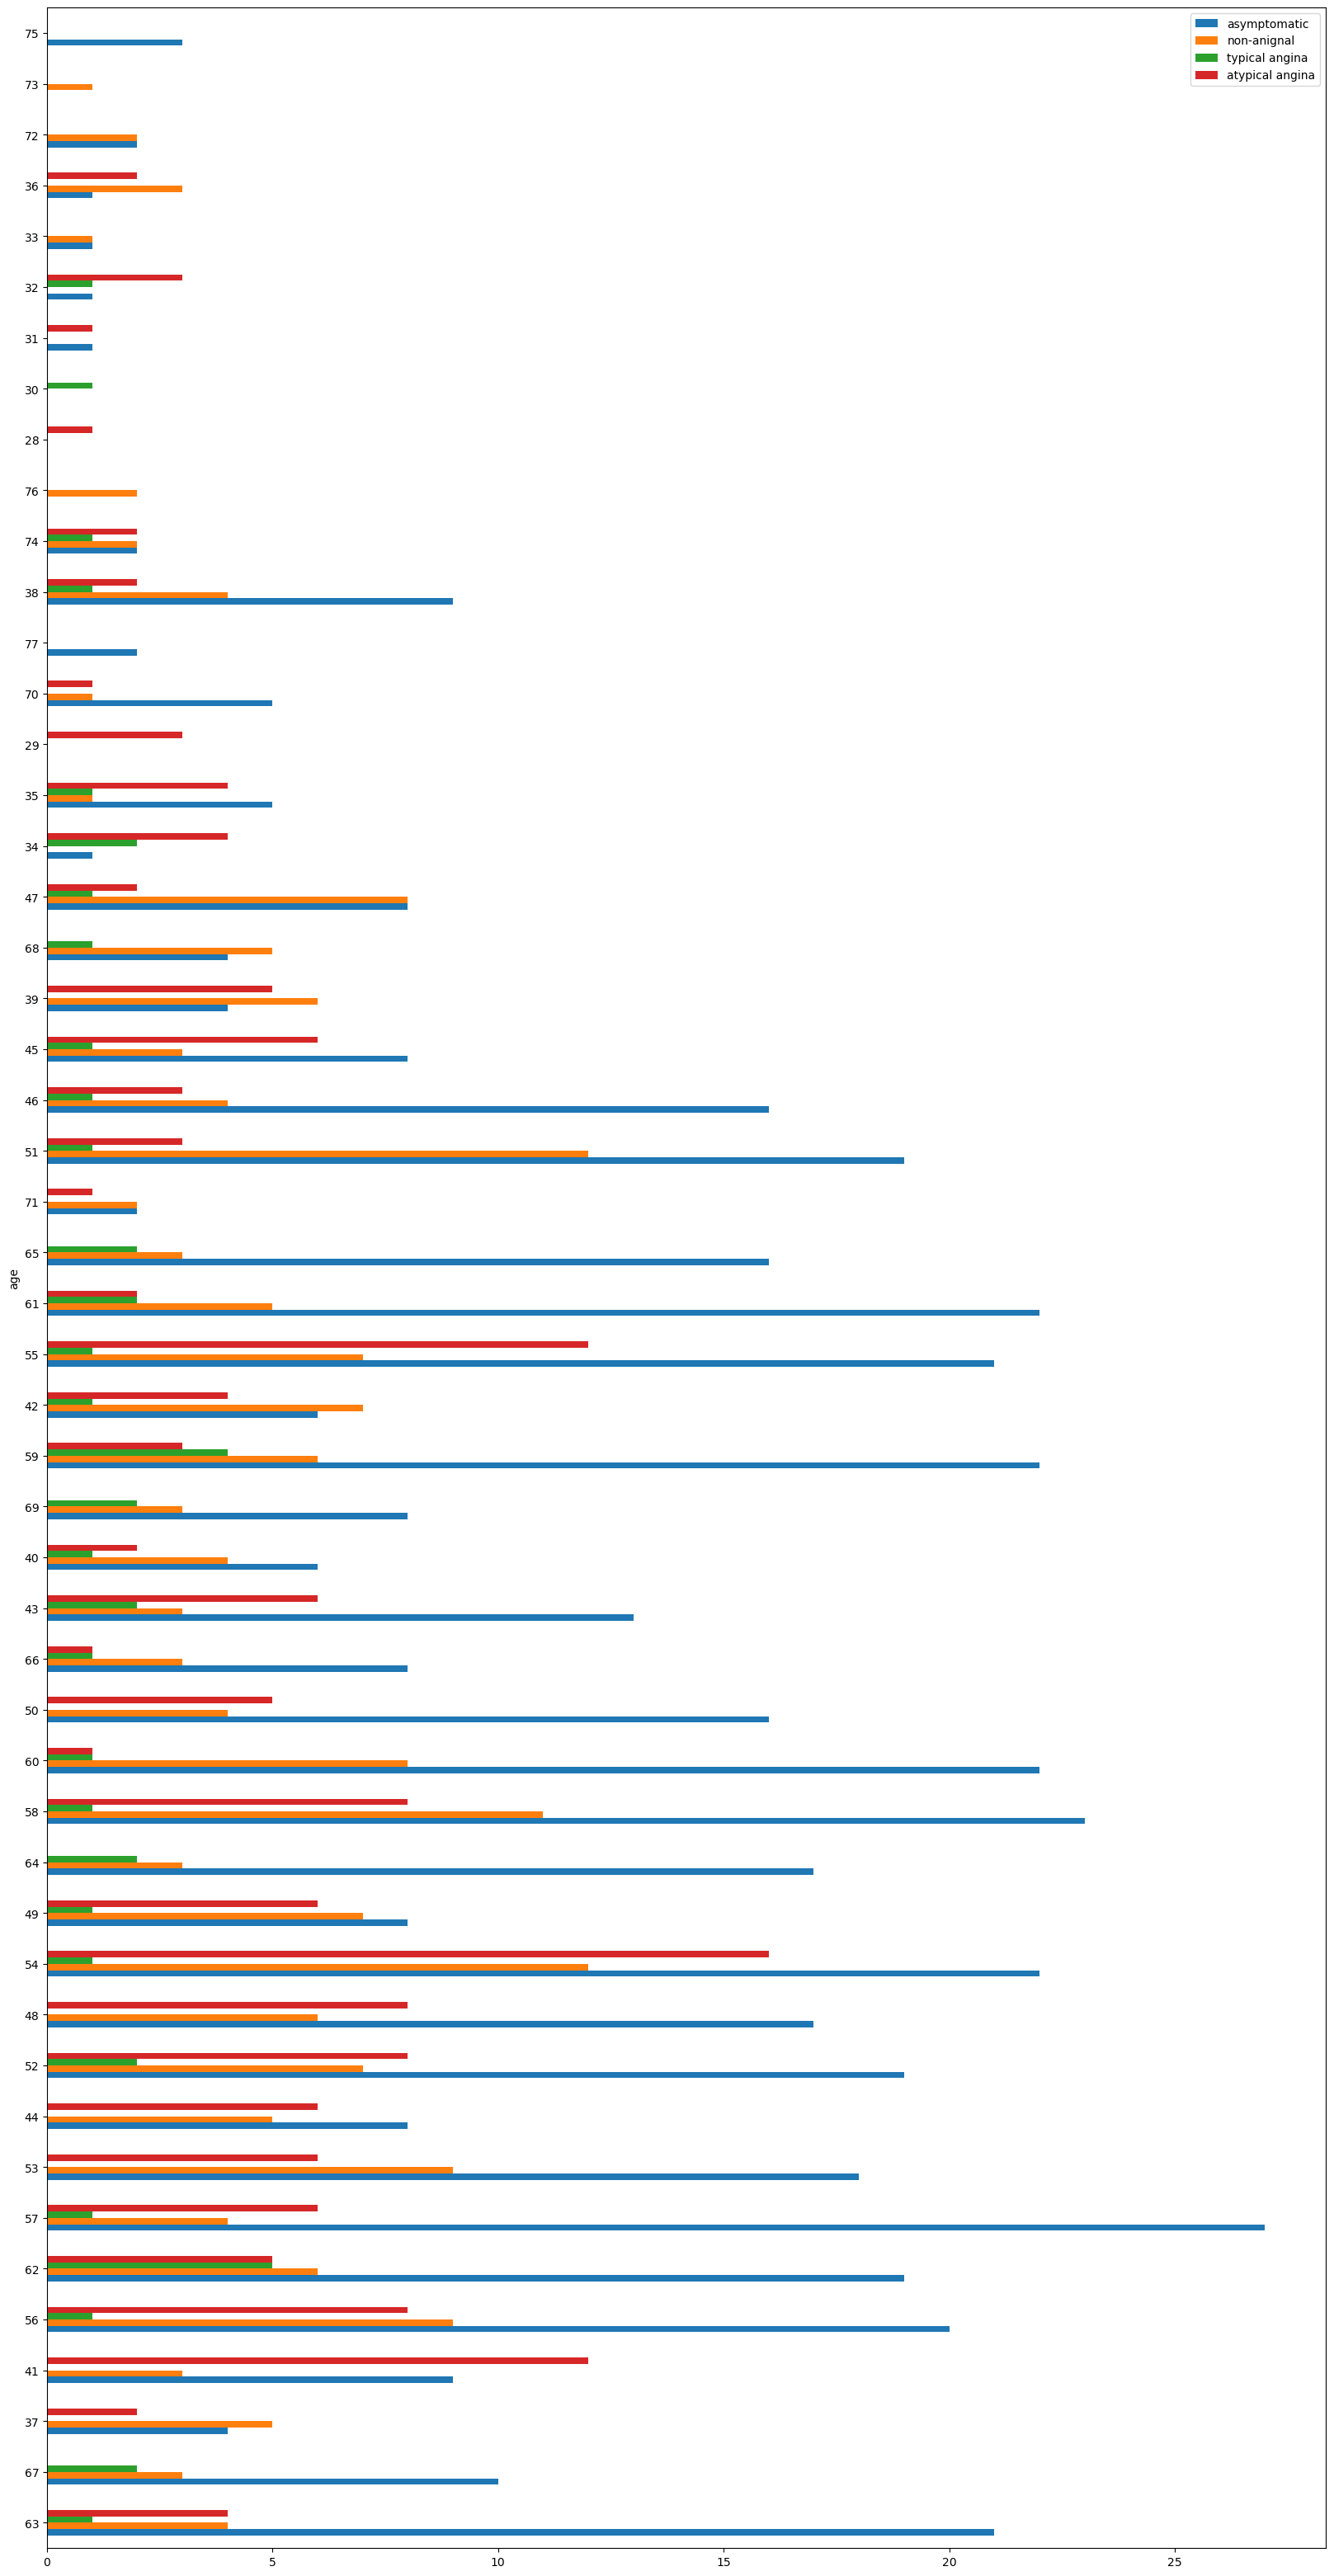

In [28]:
c_p_t.plot.barh(figsize=(20,40),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})


C:\Users\sjmad\AppData\Local\Temp\ipykernel_18232\4189840822.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  c_p_t.plot.density(figsize=(20,20),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})


<AxesSubplot:ylabel='Density'>

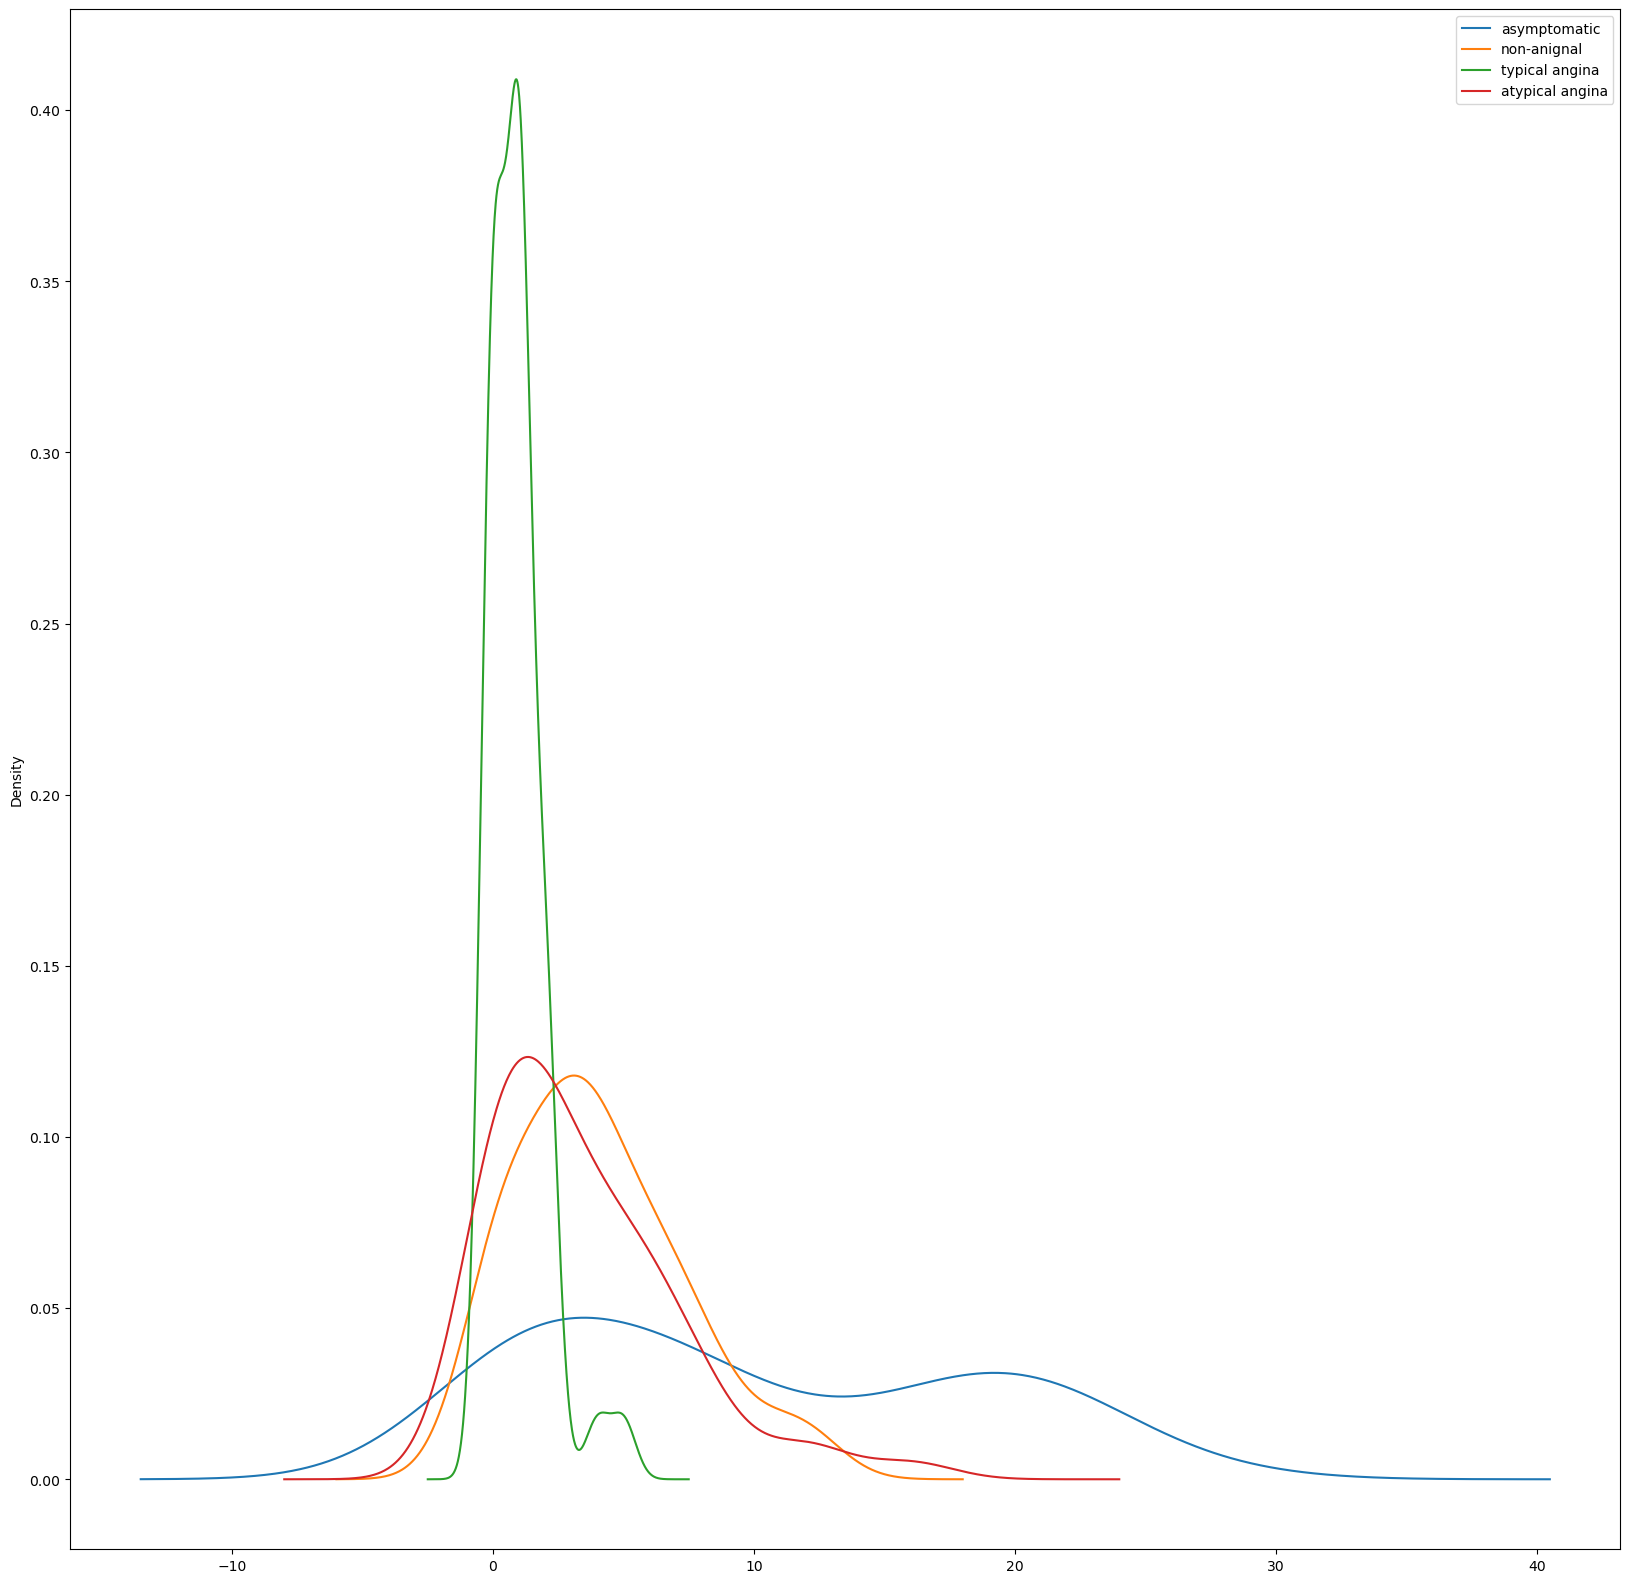

In [29]:
c_p_t.plot.density(figsize=(20,20),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})


C:\Users\sjmad\AppData\Local\Temp\ipykernel_18232\1917637151.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  c_p_t.plot.box(figsize=(20,20),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})


<AxesSubplot:>

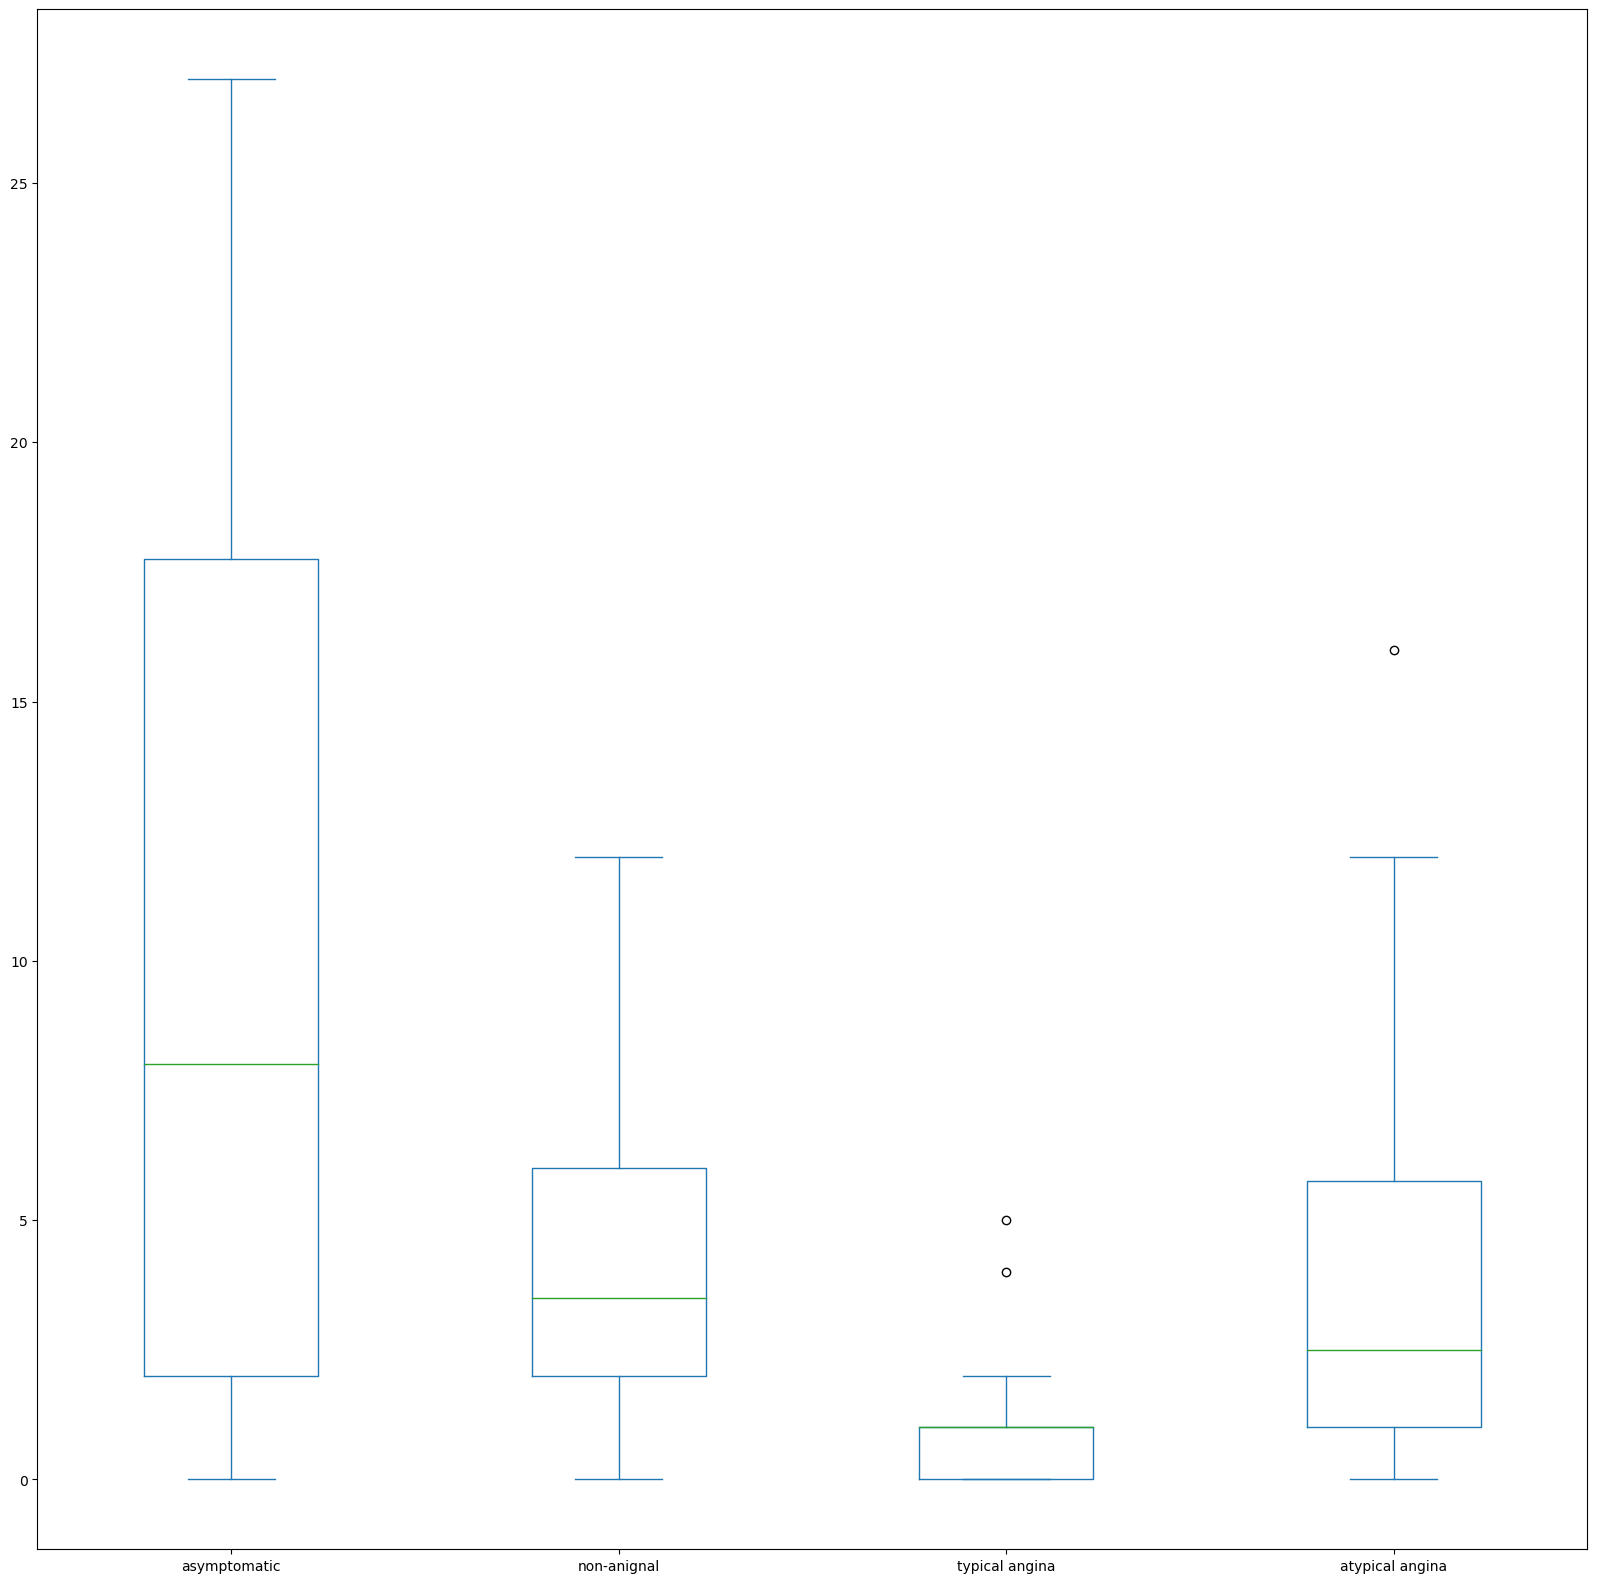

In [30]:
c_p_t.plot.box(figsize=(20,20),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})


C:\Users\sjmad\AppData\Local\Temp\ipykernel_18232\1257877074.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  c_p_t.plot.line(figsize=(20,20),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})


<AxesSubplot:xlabel='age'>

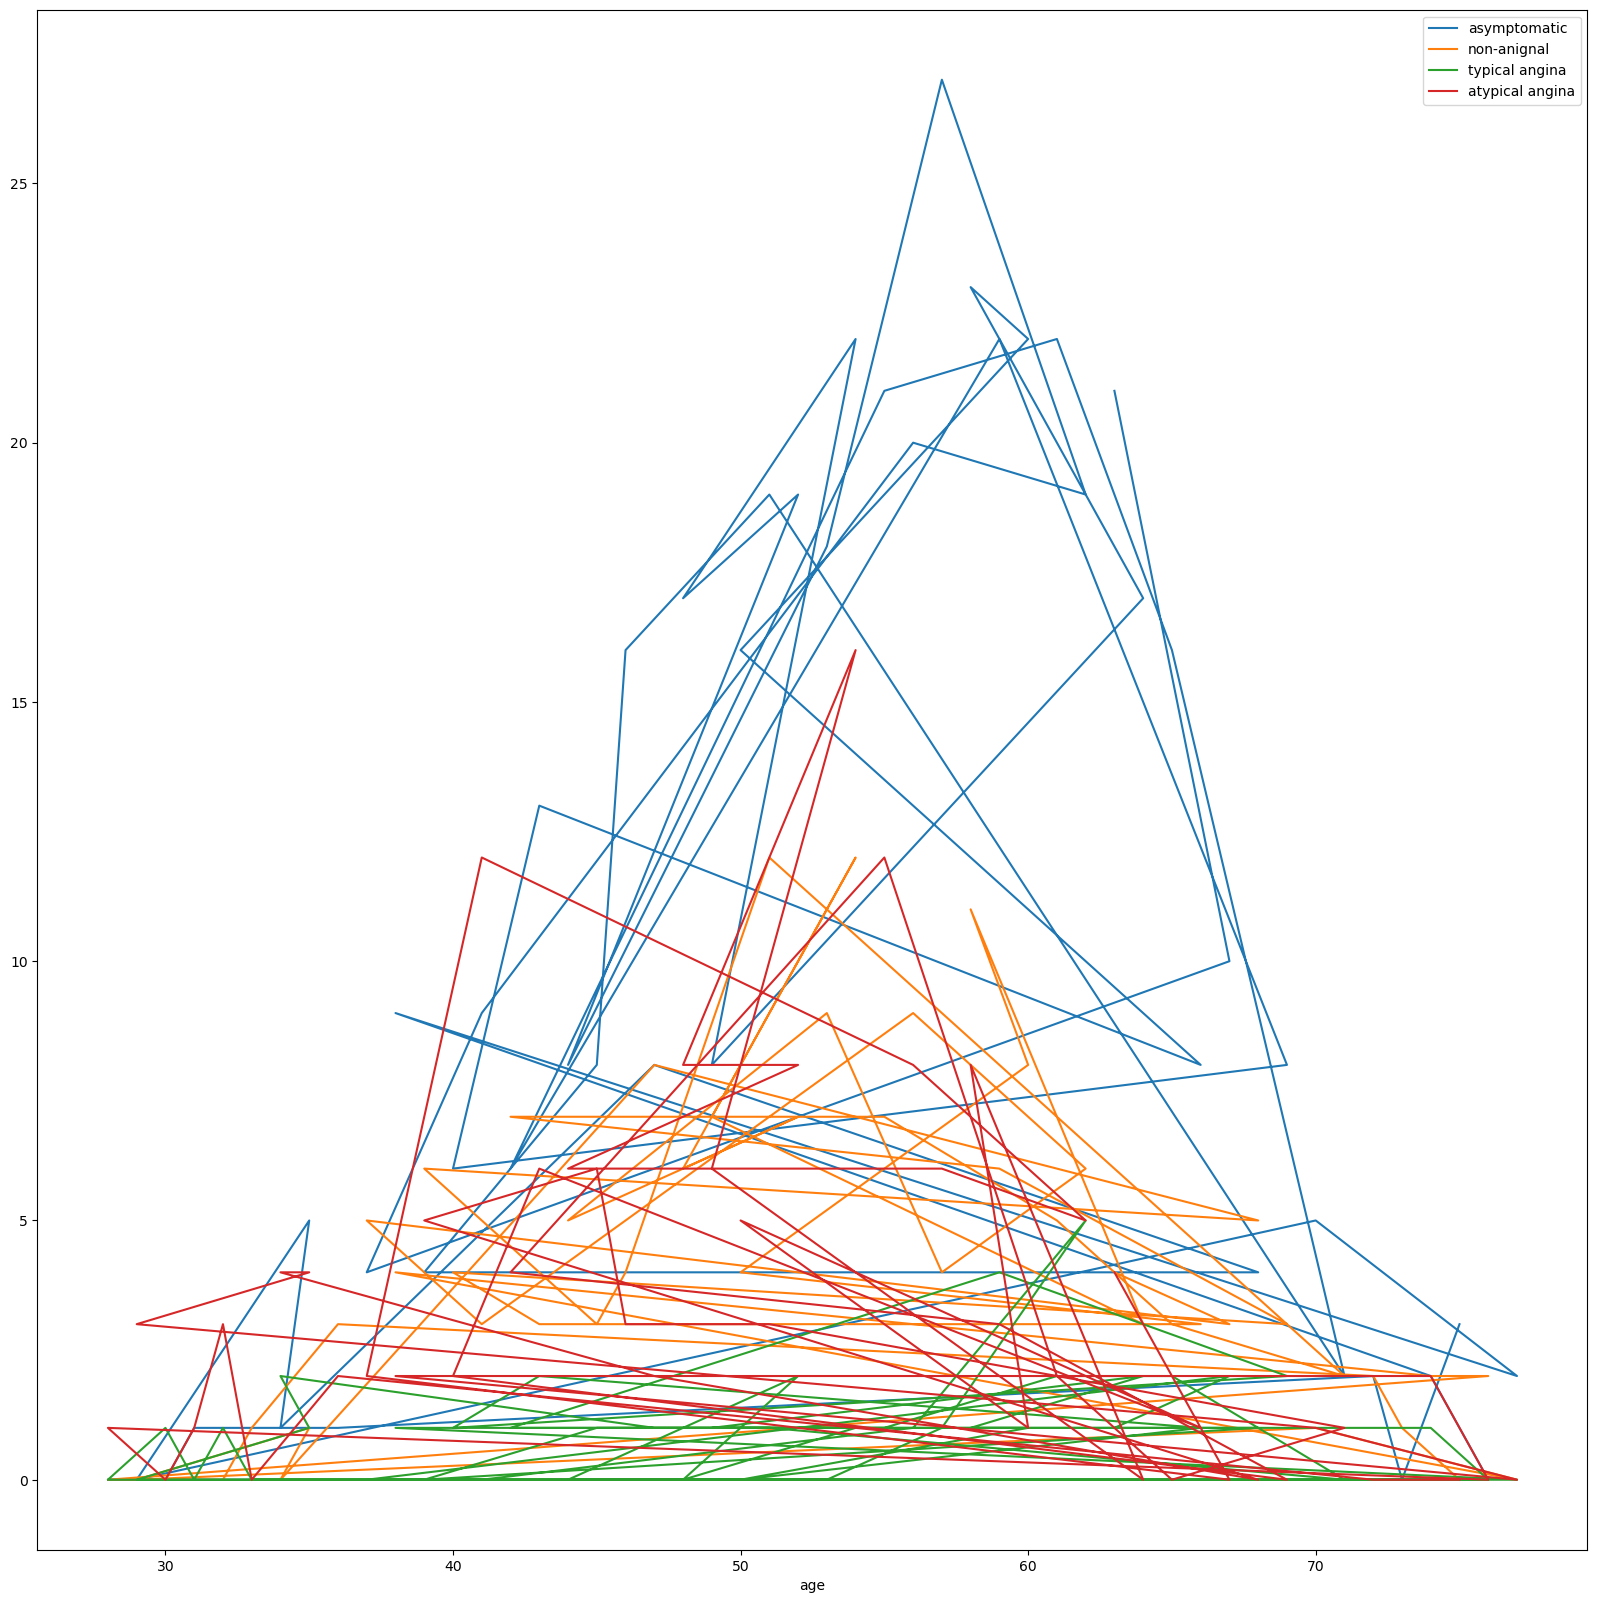

In [31]:
c_p_t.plot.line(figsize=(20,20),x= "age",y= {"asymptomatic","typical angina","non-anignal","atypical angina"})

<AxesSubplot:ylabel='age'>

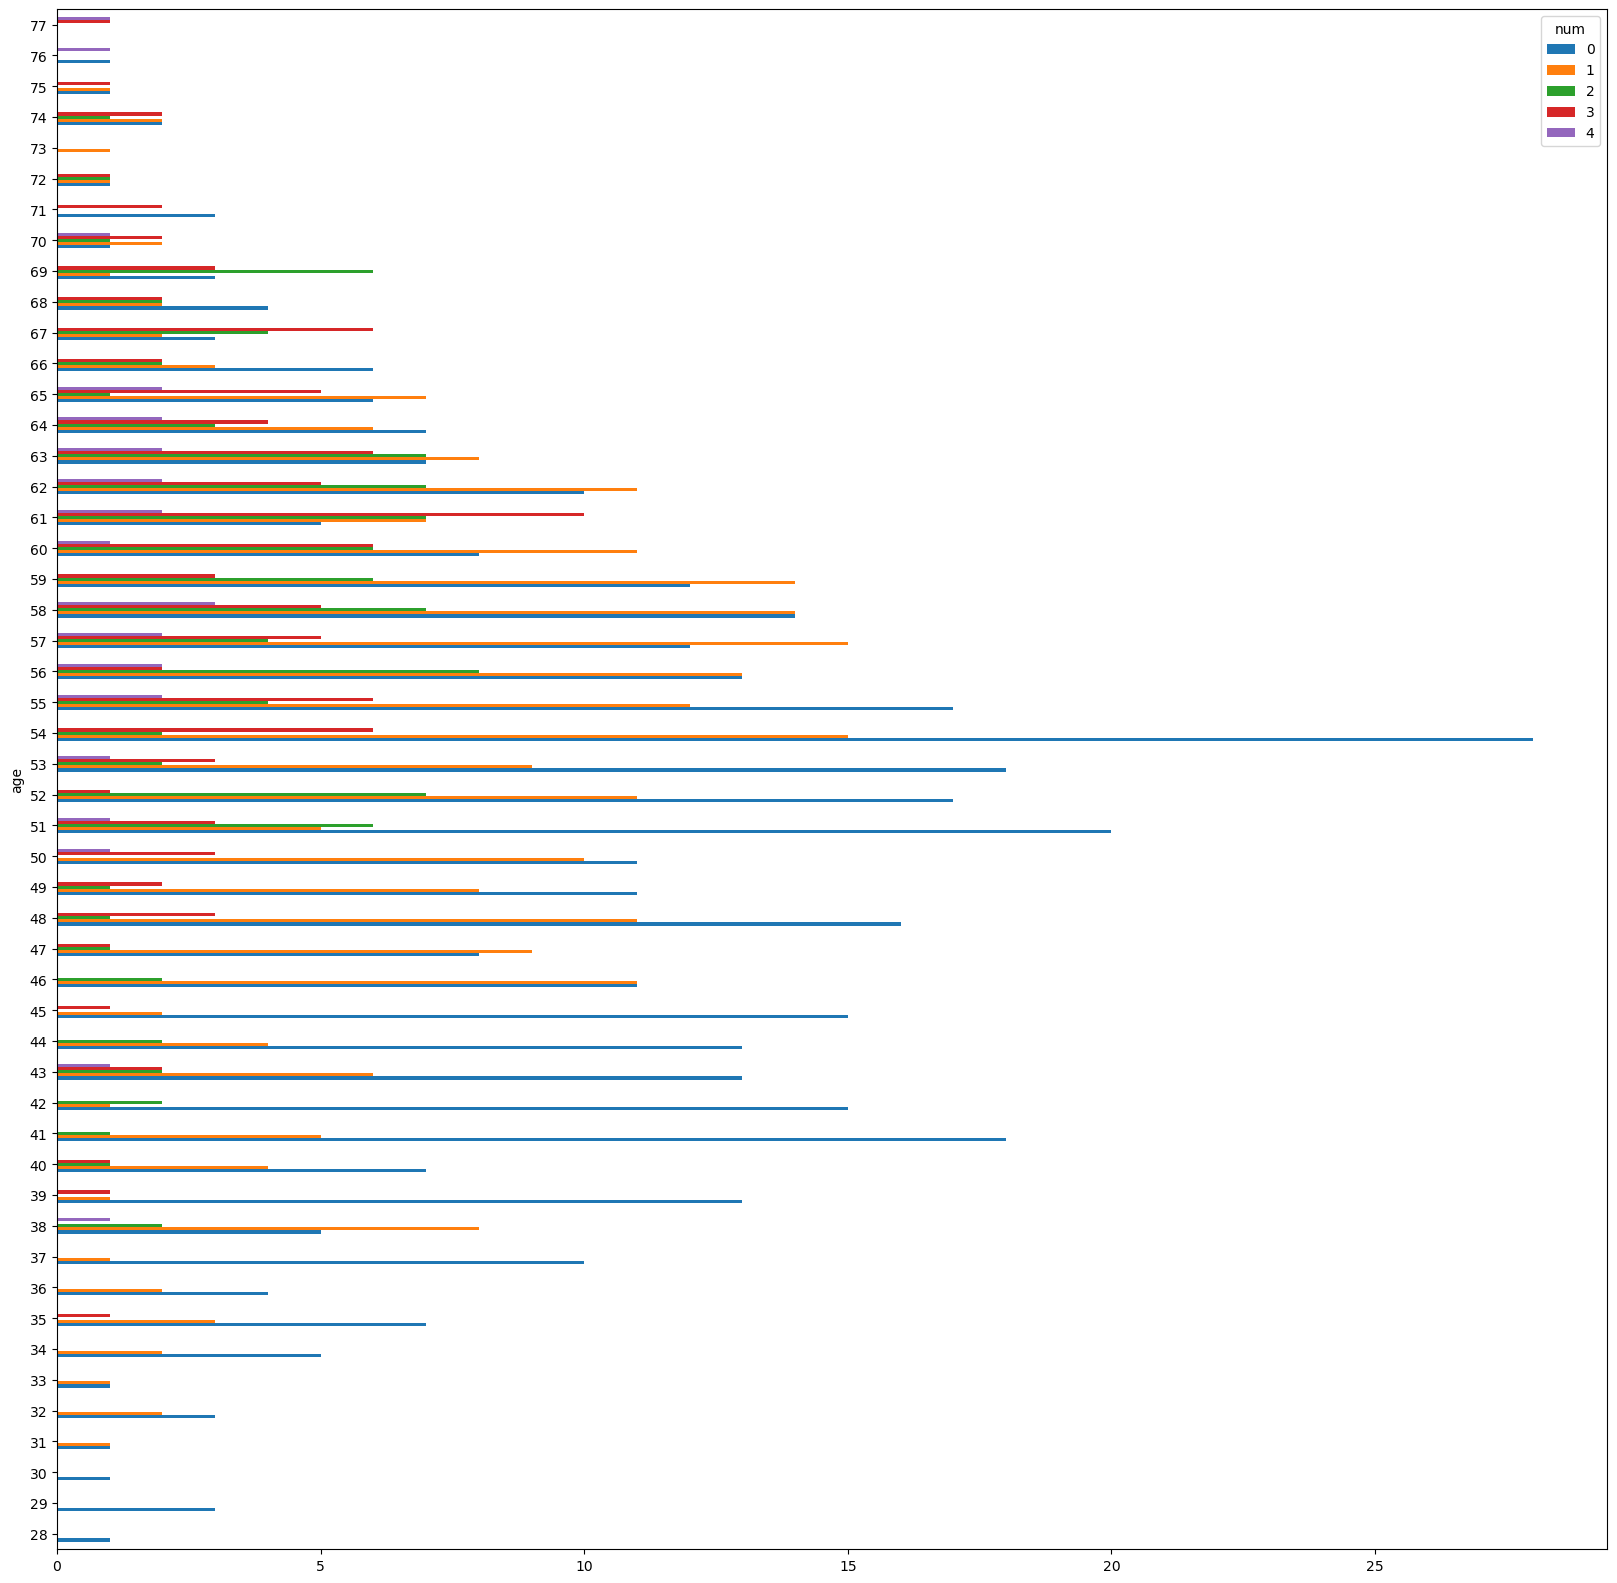

In [32]:
pd.crosstab(dk["age"],dk["num"]).plot(kind="barh",figsize=(20,20))

<AxesSubplot:xlabel='age'>

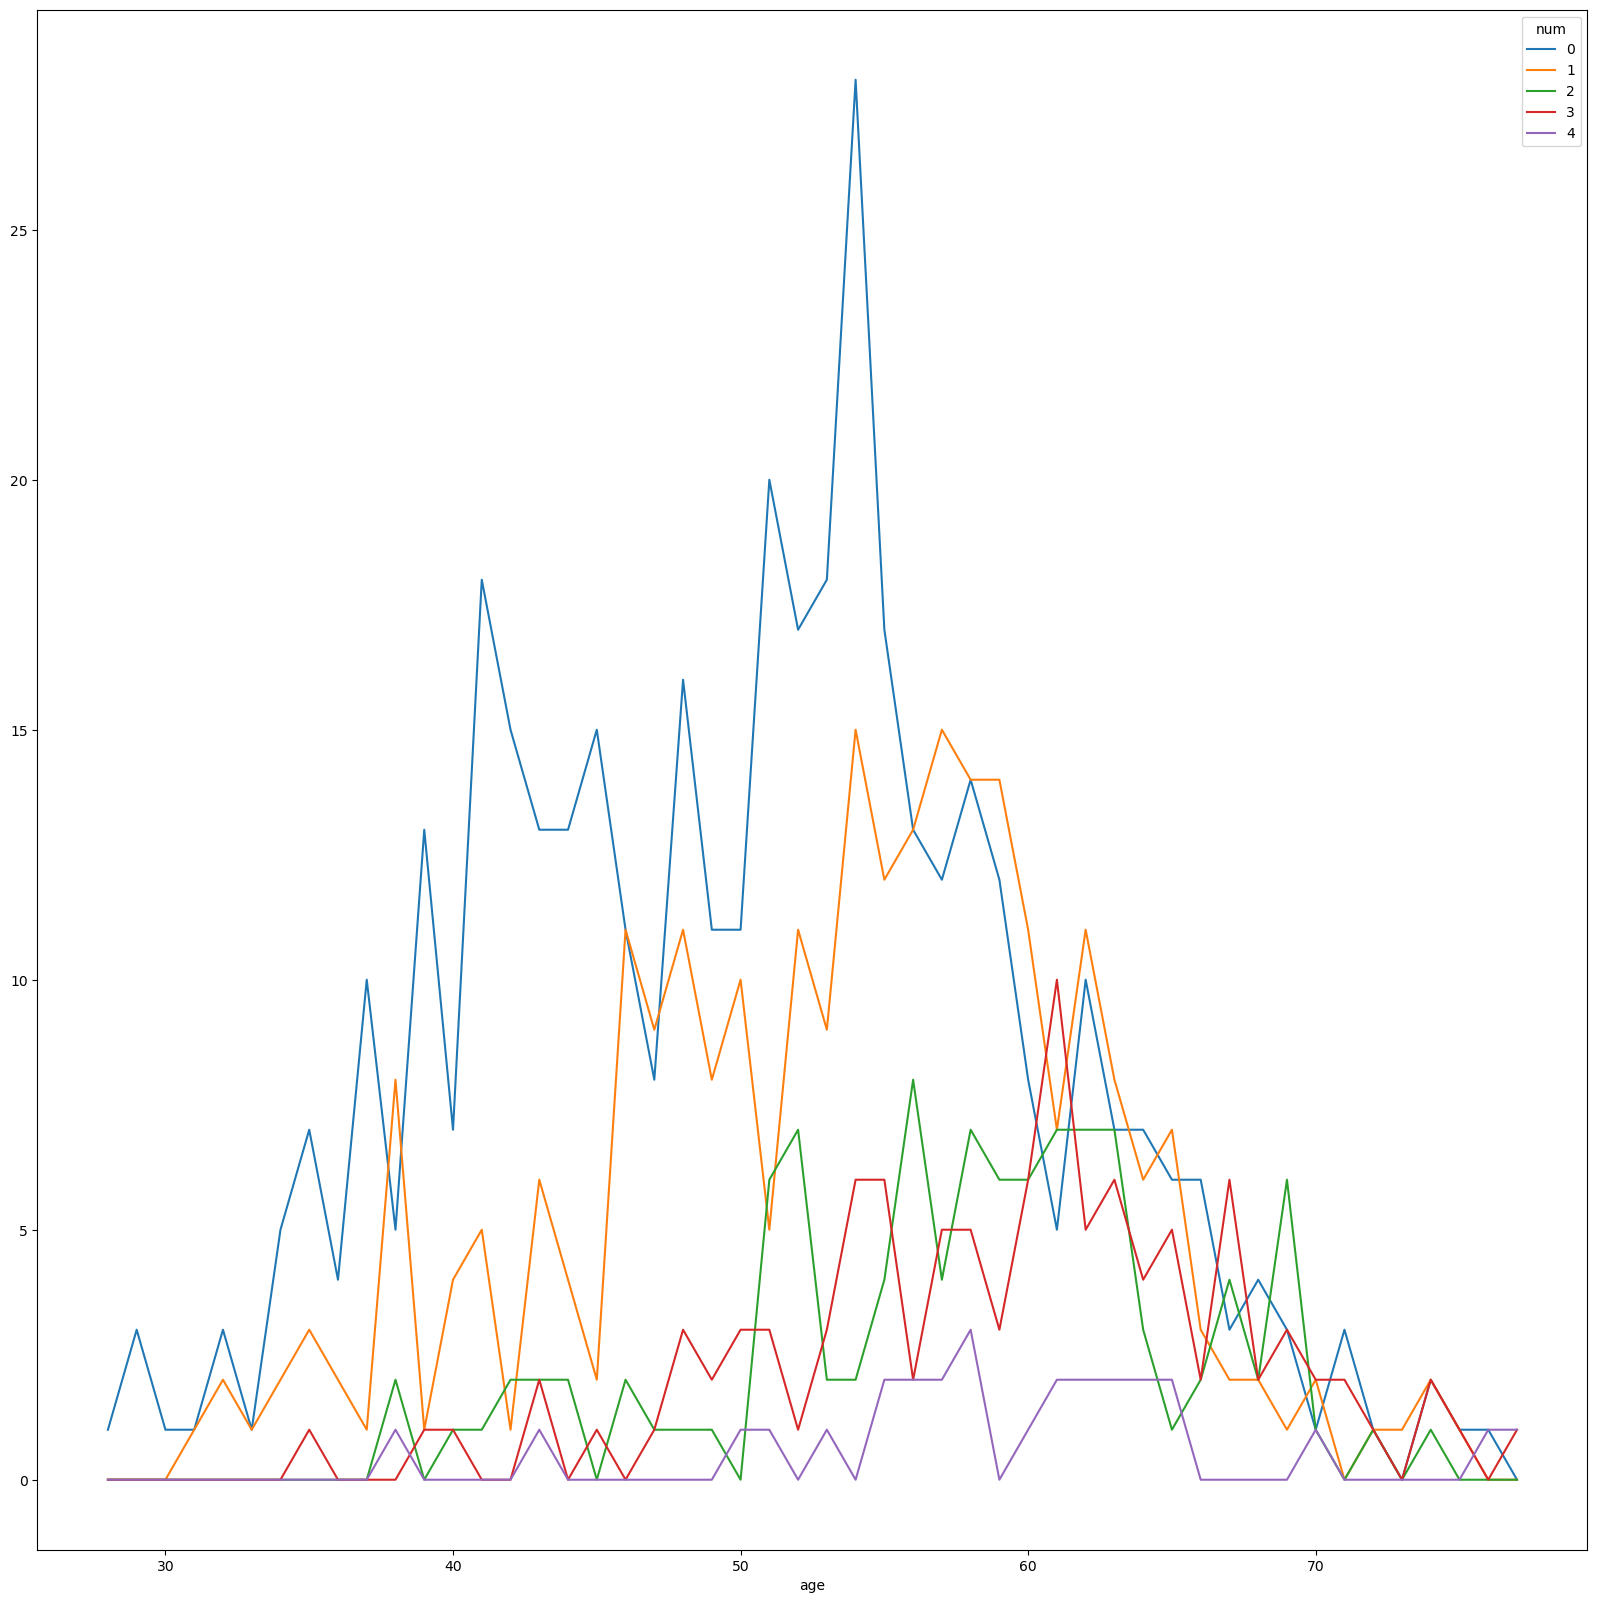

In [33]:
pd.crosstab(dk["age"],dk["num"]).plot(kind="line",figsize=(20,20))

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Heart rate')]

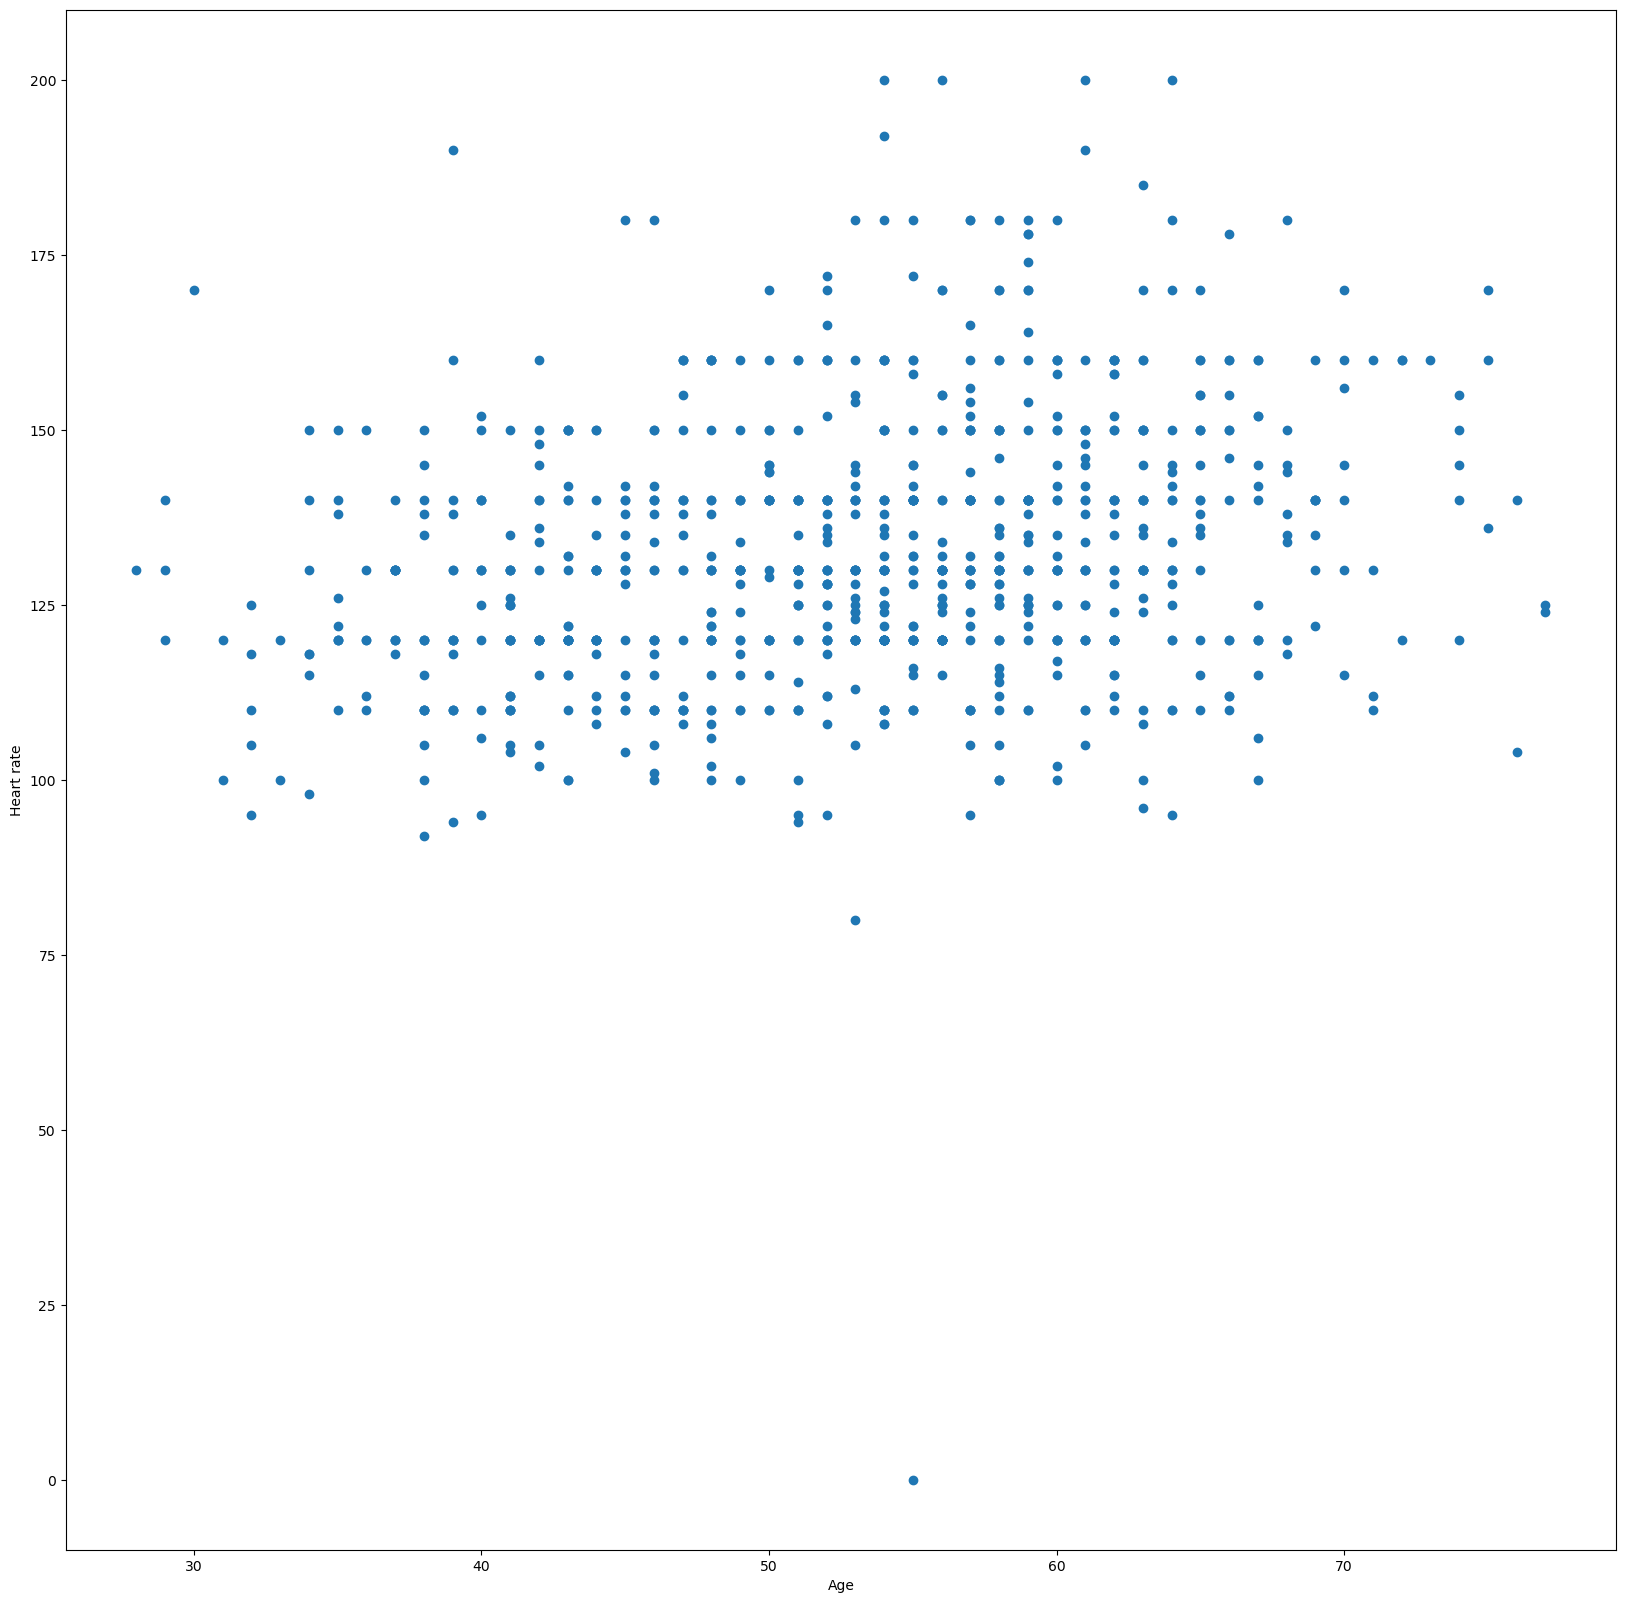

In [34]:
fig,ax=plt.subplots(figsize=(20,20))
mp=ax.scatter(dk.age[dk.cp!=0],dk.trestbps[dk.cp!=0])
#mp=ax.scatter(dk.age[dk.cp==0],dk.trestbps[dk.cp==0])
ax.legend
ax.set(xlabel="Age",ylabel="Heart rate")

In [35]:
#correlation matrix
# Correlation is a statistical term describing the degree to which two variables move in coordination with one another. If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation.

dk.corr()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.049930,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.061433,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


In [36]:
import seaborn as sns

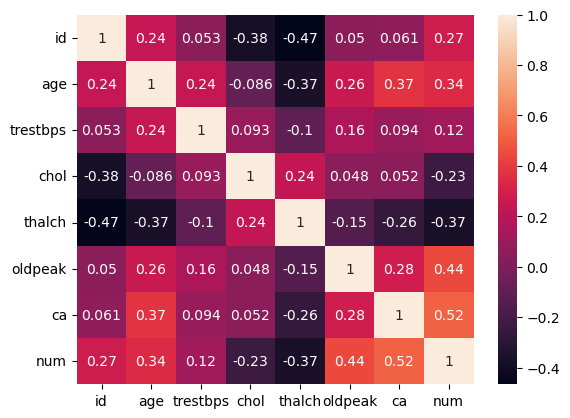

In [37]:
fig,ax=plt.subplots()
ax=sns.heatmap(data=dk.corr(),annot=True)


In [38]:
dt=dk.drop("num",axis=1)
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(dt,dk["num"],train_size=0.8)

In [39]:
def mdlscr(model,x_tr,x_t,y_tr,y_t):
     model.fit(x_tr,y_tr)
     return model.score(x_t,y_t)
dt={}

# dt["RandomForestClassifier"]=mdlscr(RandomForestClassifier(),x_train,x_test,y_train,y_test)
# dt["LinearRegression"]=mdlscr(LinearRegression(),x_train,x_test,y_train,y_test)
# dt["kNeighbour"]=mdlscr(KNeighborsClassifier(),x_train,x_test,y_train,y_test)
# dt
#Now improving the data set

In [40]:
oneht=OneHotEncoder()


In [41]:
dk.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [42]:
dk

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [43]:
imean=SimpleImputer(strategy="mean")
ifbs=SimpleImputer(strategy="constant",fill_value="missing")
ibol=SimpleImputer(strategy="constant",fill_value=False)
oh=ColumnTransformer([("mw",imean,["trestbps","chol","thalch","oldpeak","ca","num"]),("fw",ifbs,["cp","restecg","slope","thal","id","age","sex","dataset"]),("fuds",ibol,["exang","fbs"])])
tb=oh.fit_transform(dk)

In [44]:
tb=pd.DataFrame(tb)
tb

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,145.0,233.0,150.0,2.3,0.0,0.0,typical angina,lv hypertrophy,downsloping,fixed defect,1,63,Male,Cleveland,False,True
1,160.0,286.0,108.0,1.5,3.0,2.0,asymptomatic,lv hypertrophy,flat,normal,2,67,Male,Cleveland,True,False
2,120.0,229.0,129.0,2.6,2.0,1.0,asymptomatic,lv hypertrophy,flat,reversable defect,3,67,Male,Cleveland,True,False
3,130.0,250.0,187.0,3.5,0.0,0.0,non-anginal,normal,downsloping,normal,4,37,Male,Cleveland,False,False
4,130.0,204.0,172.0,1.4,0.0,0.0,atypical angina,lv hypertrophy,upsloping,normal,5,41,Female,Cleveland,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,127.0,333.0,154.0,0.0,0.676375,1.0,asymptomatic,st-t abnormality,missing,missing,916,54,Female,VA Long Beach,False,True
916,132.132404,139.0,137.545665,0.878788,0.676375,0.0,typical angina,st-t abnormality,missing,missing,917,62,Male,VA Long Beach,False,False
917,122.0,223.0,100.0,0.0,0.676375,2.0,asymptomatic,st-t abnormality,missing,fixed defect,918,55,Male,VA Long Beach,False,True
918,132.132404,385.0,137.545665,0.878788,0.676375,0.0,asymptomatic,lv hypertrophy,missing,missing,919,58,Male,VA Long Beach,False,True


In [45]:
a=dk.columns
a

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [46]:
tb.columns=["trestbps","chol","thalch","oldpeak","ca","num","cp","restecg","slope","thal","id","age","sex","dataset","exang","fbs"]

In [47]:
tb

,trestbps,chol,thalch,oldpeak,ca,num,cp,restecg,slope,thal,id,age,sex,dataset,exang,fbs
0,145.0,233.0,150.0,2.3,0.0,0.0,typical angina,lv hypertrophy,downsloping,fixed defect,1,63,Male,Cleveland,False,True
1,160.0,286.0,108.0,1.5,3.0,2.0,asymptomatic,lv hypertrophy,flat,normal,2,67,Male,Cleveland,True,False
2,120.0,229.0,129.0,2.6,2.0,1.0,asymptomatic,lv hypertrophy,flat,reversable defect,3,67,Male,Cleveland,True,False
3,130.0,250.0,187.0,3.5,0.0,0.0,non-anginal,normal,downsloping,normal,4,37,Male,Cleveland,False,False
4,130.0,204.0,172.0,1.4,0.0,0.0,atypical angina,lv hypertrophy,upsloping,normal,5,41,Female,Cleveland,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,127.0,333.0,154.0,0.0,0.676375,1.0,asymptomatic,st-t abnormality,missing,missing,916,54,Female,VA Long Beach,False,True
916,132.132404,139.0,137.545665,0.878788,0.676375,0.0,typical angina,st-t abnormality,missing,missing,917,62,Male,VA Long Beach,False,False
917,122.0,223.0,100.0,0.0,0.676375,2.0,asymptomatic,st-t abnormality,missing,fixed defect,918,55,Male,VA Long Beach,False,True
918,132.132404,385.0,137.545665,0.878788,0.676375,0.0,asymptomatic,lv hypertrophy,missing,missing,919,58,Male,VA Long Beach,False,True


In [48]:
tb.isna().sum()

trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
num         0
cp          0
restecg     0
slope       0
thal        0
id          0
age         0
sex         0
dataset     0
exang       0
fbs         0
dtype: int64

In [49]:
tb=tb.drop("id",axis=1)

In [50]:
dt=tb.drop("num",axis=1)
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(dt,tb["num"],train_size=0.8)

In [51]:
ts=ColumnTransformer([("sk",OneHotEncoder(),["cp","restecg","slope","thal","sex","dataset"])],remainder="passthrough")
kx=ts.fit_transform(dt)

In [52]:
ft=pd.DataFrame(kx)

In [53]:
ft

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,145.0,233.0,150.0,2.3,0.0,63,False,True
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,160.0,286.0,108.0,1.5,3.0,67,True,False
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,120.0,229.0,129.0,2.6,2.0,67,True,False
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,130.0,250.0,187.0,3.5,0.0,37,False,False
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,130.0,204.0,172.0,1.4,0.0,41,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,127.0,333.0,154.0,0.0,0.676375,54,False,True
916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,132.132404,139.0,137.545665,0.878788,0.676375,62,False,False
917,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,122.0,223.0,100.0,0.0,0.676375,55,False,True
918,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,132.132404,385.0,137.545665,0.878788,0.676375,58,False,True


In [54]:
for i in range(0,28):
    ft[i]=ft[i].astype('float')
ft[28]=ft[28].astype('bool')
ft[29]=ft[29].astype('bool')

In [55]:
ft.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28       bool
29       bool
dtype: object

In [56]:
ans={}
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(ft,tb["num"].astype('int'),train_size=0.8)
ans["RandomForestClassifier"]=mdlscr(RandomForestClassifier(),x_train,x_test,y_train,y_test)
ans["LinearRegression"]=mdlscr(LinearRegression(),x_train,x_test,y_train,y_test)
ans["kNeighbour"]=mdlscr(KNeighborsClassifier(),x_train,x_test,y_train,y_test)
ans
#Now improving the data set

{'RandomForestClassifier': 0.5434782608695652,
 'LinearRegression': 0.4819116995156597,
 'kNeighbour': 0.44565217391304346}

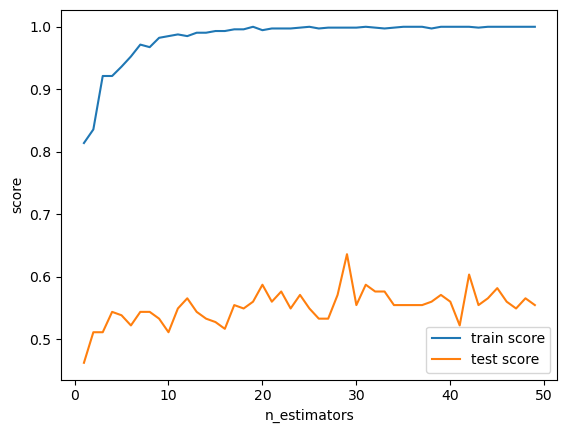

In [57]:
b_model=RandomForestClassifier()
train_score=[]
test_score=[]
n_estimators=range(1,50)
for i in n_estimators:
    b_model.set_params(n_estimators=i)
    b_model.fit(x_train,y_train)
    train_score.append(b_model.score(x_train,y_train))
    test_score.append(b_model.score(x_test,y_test))
plt.plot(n_estimators,train_score,label="train score")
plt.plot(n_estimators,test_score,label="test score")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend()


In [58]:
b_model.set_params(n_estimators=4)

RandomForestClassifier(n_estimators=4)

In [63]:
ht={
    "n_estimators": range(0,500,10),
    "max_depth":  range(0,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,10)
}
true_rfc=RandomizedSearchCV(b_model,ht,n_iter=100,cv=5)
true_rfc.fit(x_train,y_train)

c:\Users\sjmad\Desktop\c1\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
85 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sjmad\Desktop\c1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sjmad\Desktop\c1\env\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\sjmad\Desktop\c1\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\sjmad\Desktop\c

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=4),
                   n_iter=100,
                   param_distributions={'max_depth': range(0, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(0, 500, 10)})

In [64]:
true_rfc.best_params_

{'n_estimators': 120,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 6}

In [65]:
true_rfc.score(x_test,y_test)

0.5489130434782609

In [72]:
ht={
    "n_estimators": range(0,10,2),
    "max_depth":  range(0,10,2),
    "min_samples_split": range(1,10,2),
    "min_samples_leaf": range(1,10,2)
}
nb_model=GridSearchCV(b_model,ht,cv=5)

In [73]:

nb_model.fit(x_train,y_train)

c:\Users\sjmad\Desktop\c1\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1525 fits failed out of a total of 3125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
625 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sjmad\Desktop\c1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sjmad\Desktop\c1\env\lib\site-packages\sklearn\ensemble\_forest.py", line 396, in fit
    self._validate_estimator()
  File "c:\Users\sjmad\Desktop\c1\env\lib\site-packages\sklearn\ensemble\_base.py", line 143, in _validate_estimator
    raise ValueError(
ValueError: n_estimato

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=4),
             param_grid={'max_depth': range(0, 10, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 10, 2),
                         'n_estimators': range(0, 10, 2)})

In [74]:
nb_model.score(x_test,y_test)

0.5543478260869565